# LifeCycle of all Data Science Projects

1. Data Analysis
2. Feature Engineering
3. Exploratory data analysis
4. Model Building 
5. Model Deployment 

In [467]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#to display all columns of the dataframe
pd.pandas.set_option('display.max_columns',None)


In [468]:
df = pd.read_csv('train.csv')
df.shape

(1460, 81)

In [469]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 1. Data Analysis 
Understanding more about the data to find out below stuffs

1. Missing Values
2. All the Numerical Variables
3. Distribution of Numerical Variables
4. Catergorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship b/w independent and dependent feature(SalePrice)

### 1. Missing Values

In [470]:
features_with_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1]

for feature in features_with_nan:
    print(feature,np.round(df[feature].isnull().mean(),4),'--> Missing Values')

LotFrontage 0.1774 --> Missing Values
Alley 0.9377 --> Missing Values
MasVnrType 0.0055 --> Missing Values
MasVnrArea 0.0055 --> Missing Values
BsmtQual 0.0253 --> Missing Values
BsmtCond 0.0253 --> Missing Values
BsmtExposure 0.026 --> Missing Values
BsmtFinType1 0.0253 --> Missing Values
BsmtFinType2 0.026 --> Missing Values
FireplaceQu 0.4726 --> Missing Values
GarageType 0.0555 --> Missing Values
GarageYrBlt 0.0555 --> Missing Values
GarageFinish 0.0555 --> Missing Values
GarageQual 0.0555 --> Missing Values
GarageCond 0.0555 --> Missing Values
PoolQC 0.9952 --> Missing Values
Fence 0.8075 --> Missing Values
MiscFeature 0.963 --> Missing Values


## Since we have many Missing Values , we need to find the relationship between missing values and the sales Price

-- We Can do the by plotting diagrams

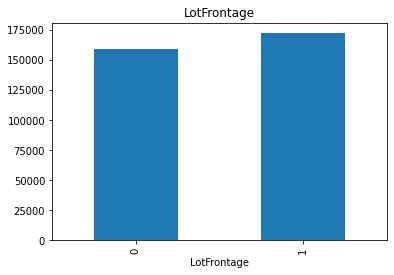

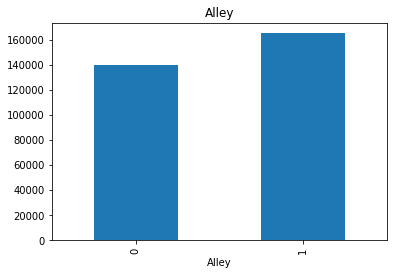

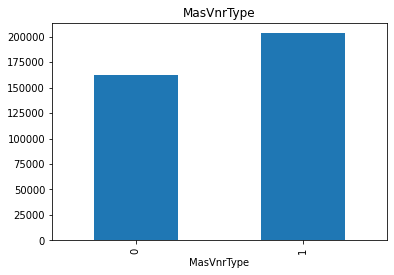

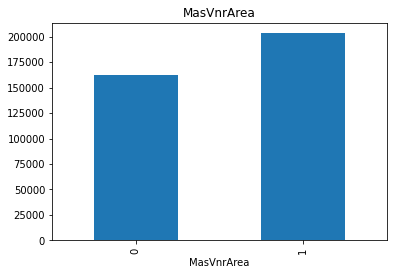

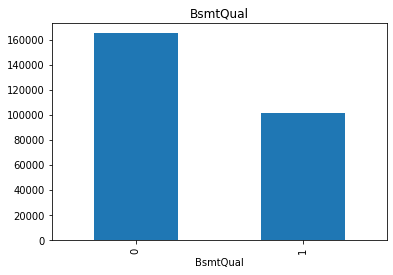

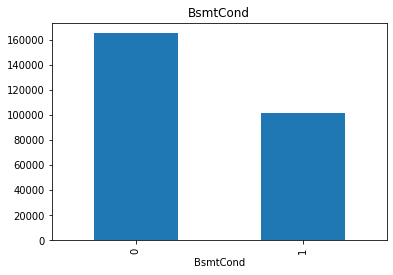

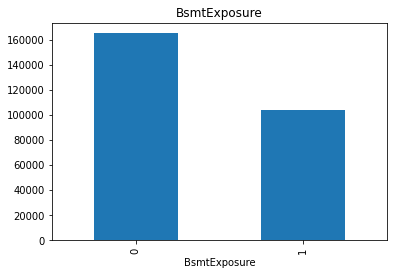

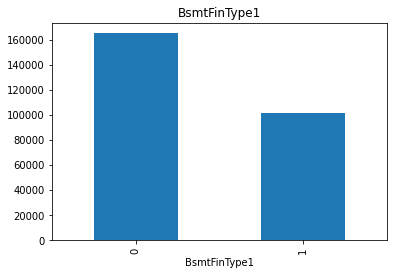

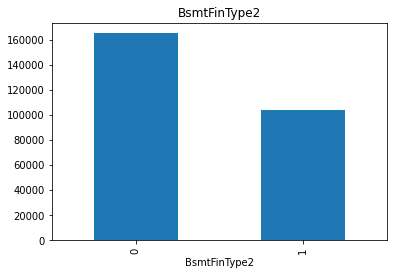

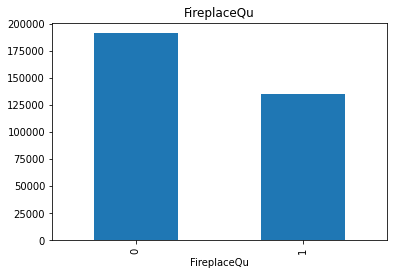

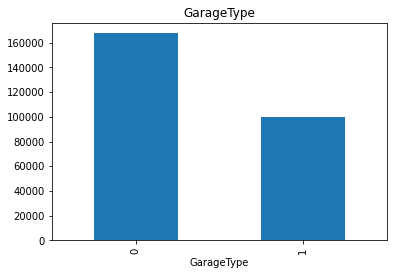

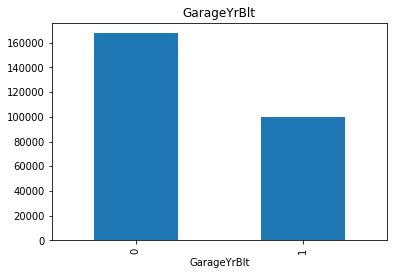

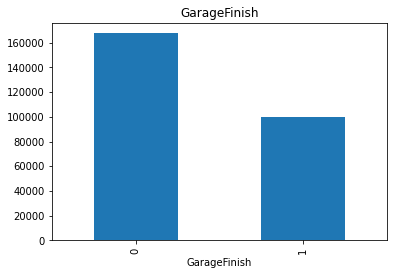

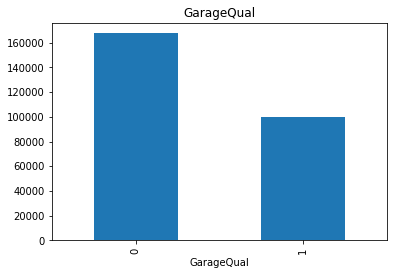

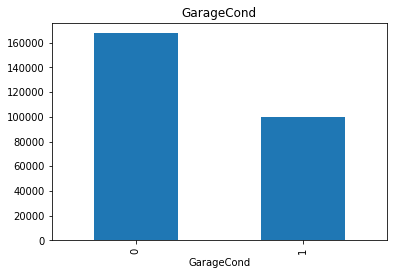

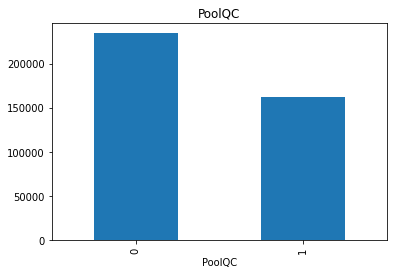

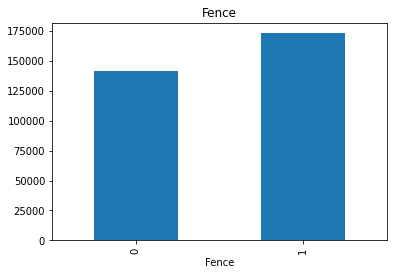

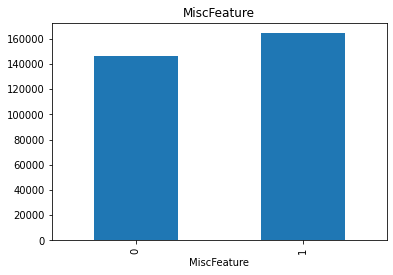

In [471]:
for feature in features_with_nan:
    data = df.copy()
    
    #lets make a variable that indicates 1 if the observation was missing or 0 if its present
    data[feature] = np.where(data[feature].isnull(),1,0) 
    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

Here with the Realtion b/w nan values and Dependent Variable is Clearly Visible .So we Need to handle these missing values with something meaningful which we will do in **feature engineering**

Some Features like ID is not required , we have to remove it in **feature engineering**

In [472]:
print(f'ID of Houses {len(df.Id)}')

ID of Houses 1460


## Numerical Variables

In [473]:
#list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']

print("Number of Numerical Variables:   ", len(numerical_features))

df[numerical_features].head()

Number of Numerical Variables:    38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


#### Temporal Varibles (Eg: DateTime Variables)

From the Dataset we have 4 year variables. We Have to extract information from the datetime variables like No:of Years or No:of days.

Example : 

We can get the difference in years b/w ***year build*** and ***year sold*** for which we will perform **~~feature engineering later~~**

In [474]:
#extracting features which has year information
year_features = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [475]:
for feature in year_features:
    print(feature , df[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House Price vs Year Sold')

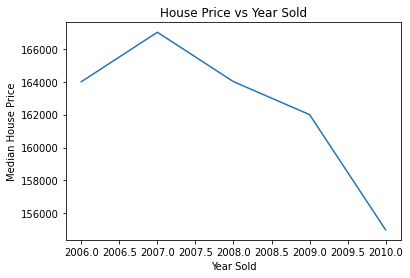

In [476]:
# lets analyze the temporal datetime variable
#first we will check the relationship b/w house sold year and the dependent variable

df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel("Year Sold")
plt.ylabel("Median House Price")
plt.title("House Price vs Year Sold")

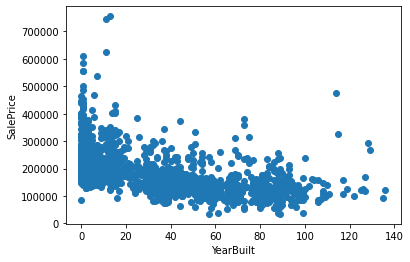

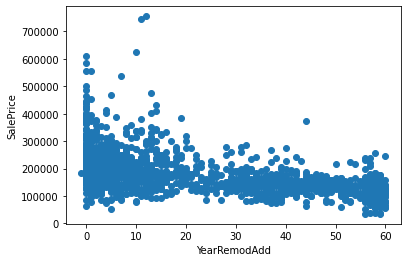

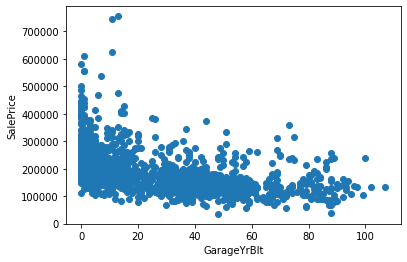

In [477]:
# here the sale price is decreasing with the year which cannot be true
# we will compare all the years with dependent variable

for feature in year_features:
    if feature != 'YrSold':
        data = df.copy()
        #diff b/w year sold and year of each feature ex:yrbuilt-yrsold = age of the house 
        data[feature] = data['YrSold'] - data[feature]
    
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [478]:
#numerical variables are of 2 types 
# Continous Variable and Discreate Variables

discreate_variables = [feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_features+['Id']]

print("Number of discreate varibales  ",len(discreate_variables) )

Number of discreate varibales   17


In [479]:
df[discreate_variables].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


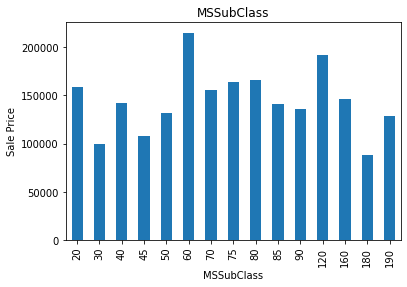

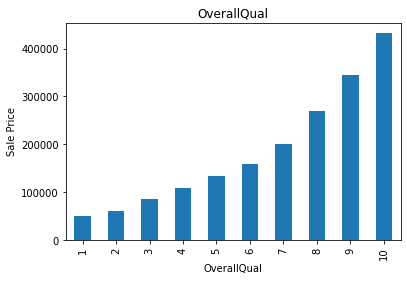

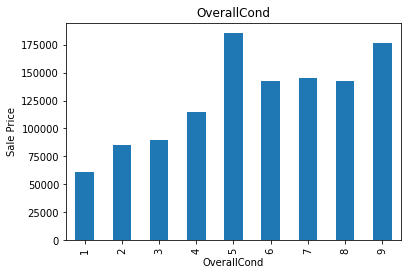

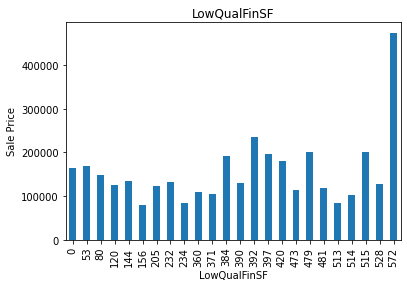

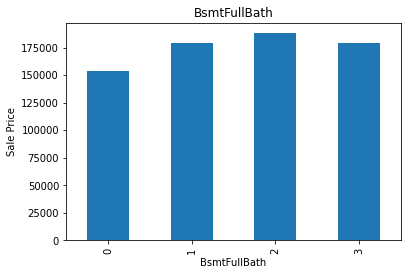

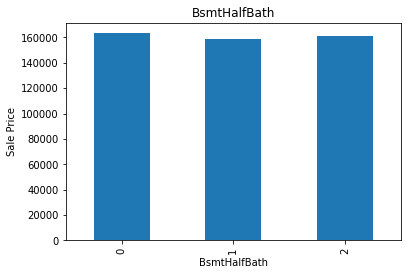

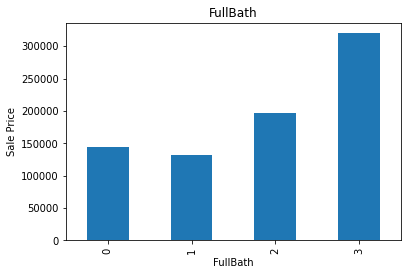

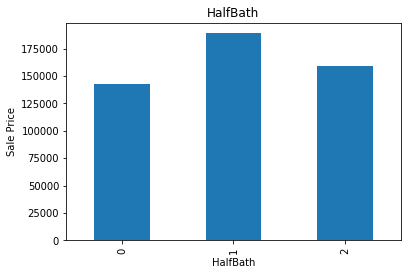

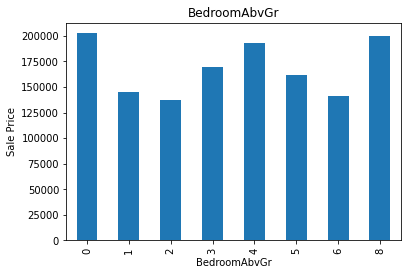

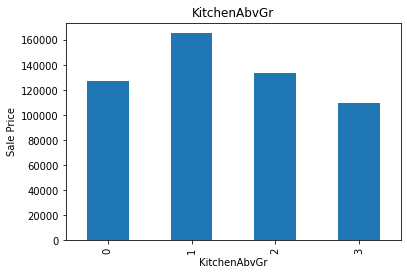

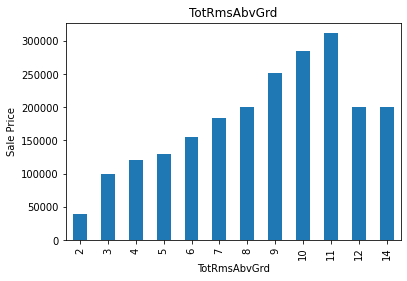

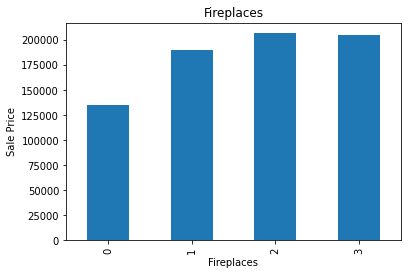

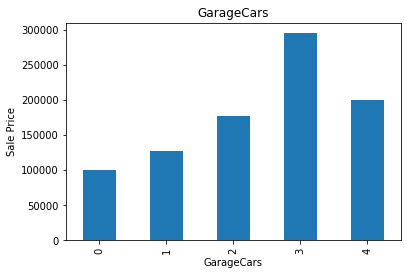

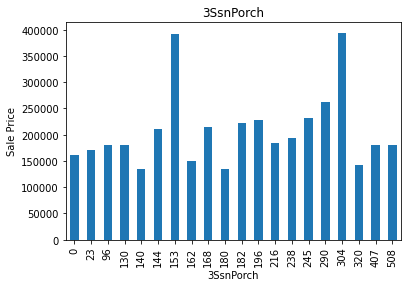

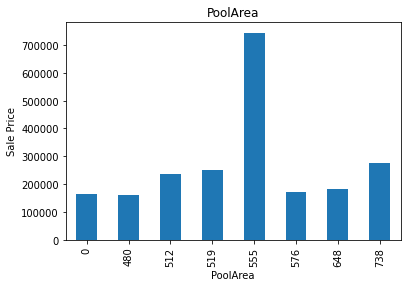

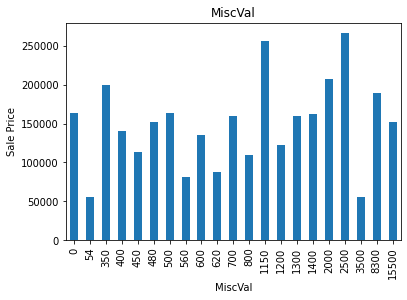

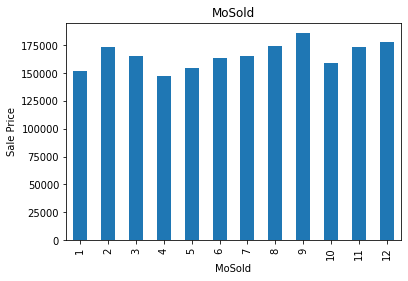

In [480]:
# RelationShip b/w these features and the dependent feature

for feature in discreate_variables:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Sale Price")
    plt.title(feature)
    plt.show()

In [481]:
# Analyzing Continouse Variables
continous_variables = [feature for feature in numerical_features if feature not in discreate_variables and feature not in year_features+['Id']]
print("Number of discreate varibales  ",len(continous_variables) )

Number of discreate varibales   16


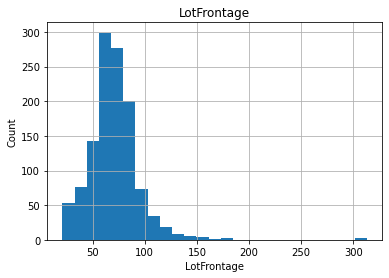

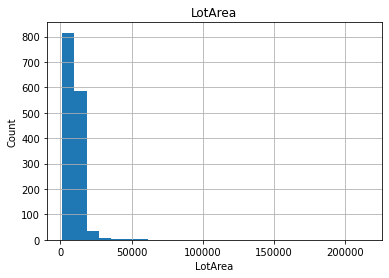

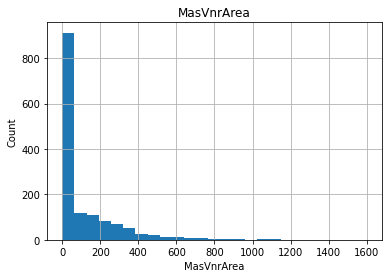

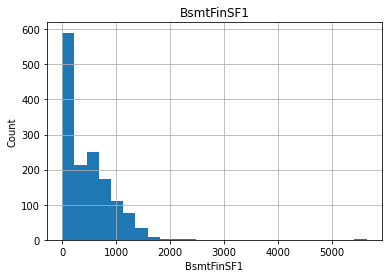

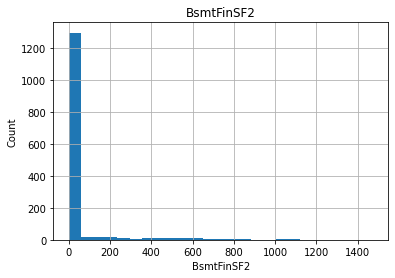

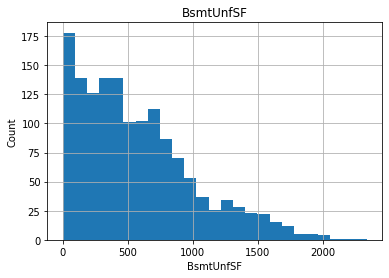

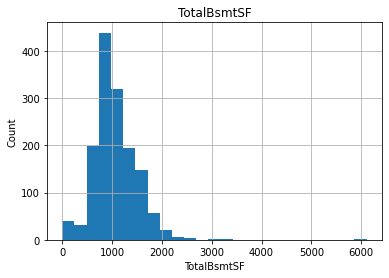

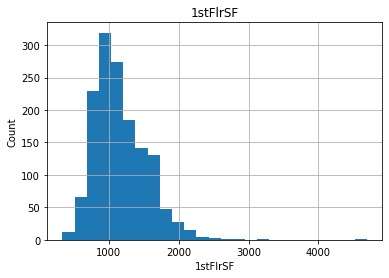

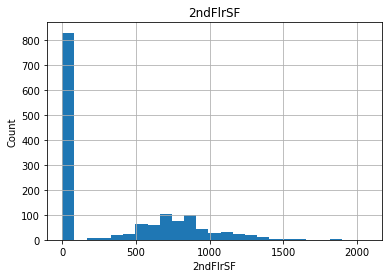

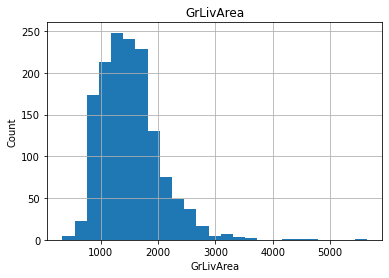

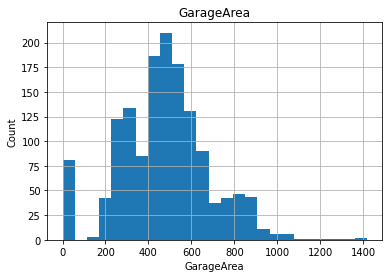

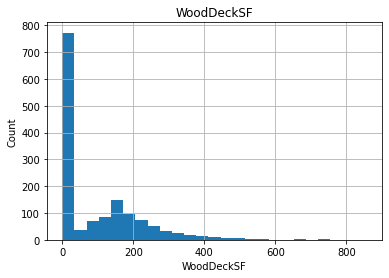

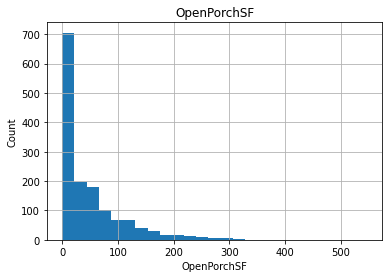

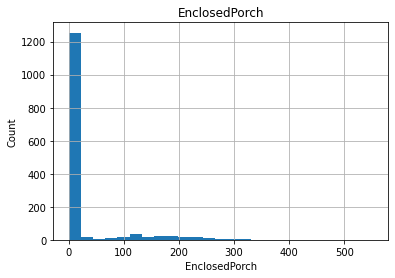

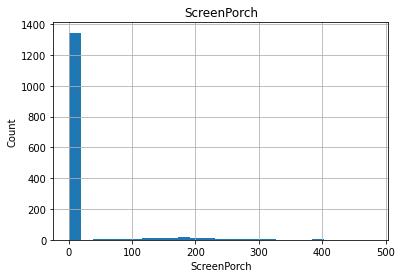

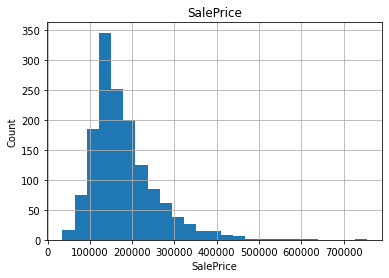

In [482]:
# Analyse the distribution of these continous variables

for feature in continous_variables:
    data = df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

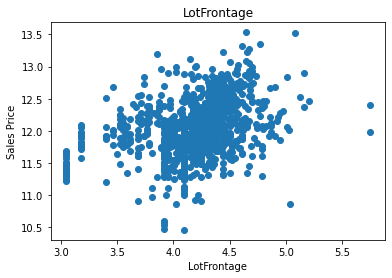

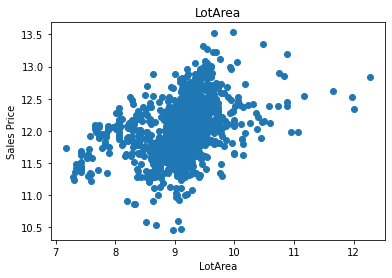

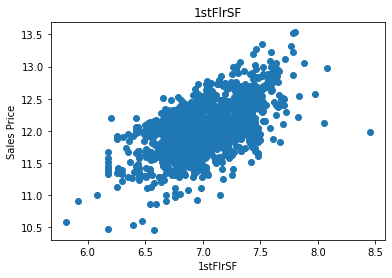

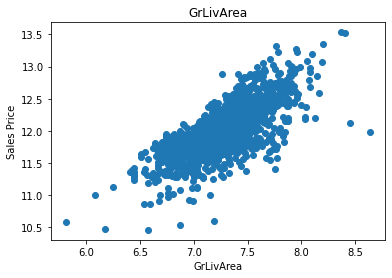

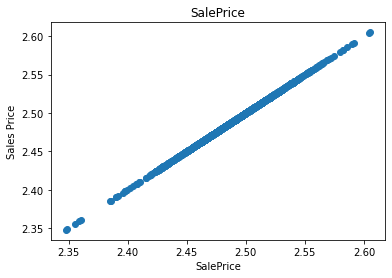

In [483]:
# here the most of the features has skewed distribution!
# hence we use Logarithmic transformation



for feature in continous_variables:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Sales Price')
        plt.title(feature)
        plt.show()

### Handling Outliers

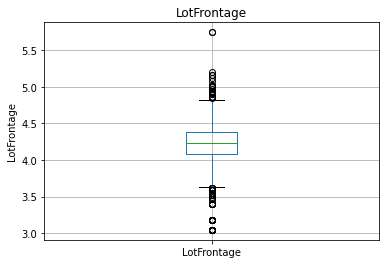

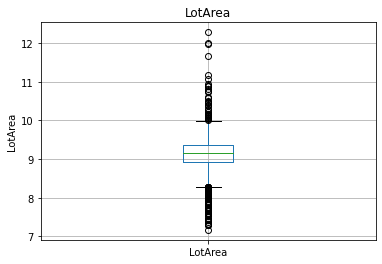

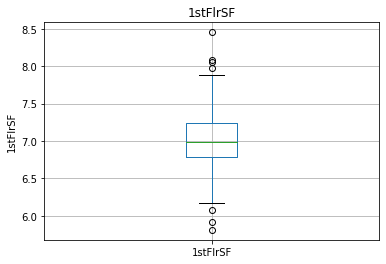

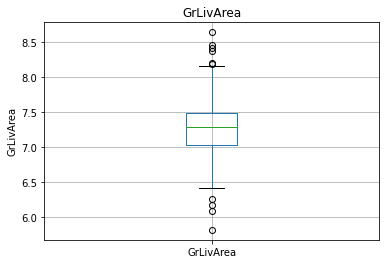

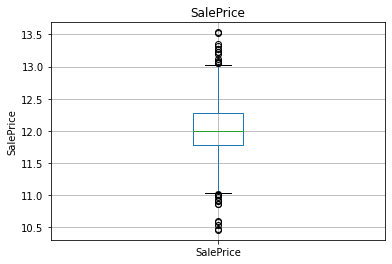

In [484]:
#use this only on continous variables
for feature in continous_variables:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

### Categorical Feature

In [485]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [486]:
df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [487]:
#finding the cardinality value (Finding the number of unique categories in each feature)
for feature in categorical_features:
    print(f'{feature}    number of categories  -  {len(df[feature].unique())}')

MSZoning    number of categories  -  5
Street    number of categories  -  2
Alley    number of categories  -  3
LotShape    number of categories  -  4
LandContour    number of categories  -  4
Utilities    number of categories  -  2
LotConfig    number of categories  -  5
LandSlope    number of categories  -  3
Neighborhood    number of categories  -  25
Condition1    number of categories  -  9
Condition2    number of categories  -  8
BldgType    number of categories  -  5
HouseStyle    number of categories  -  8
RoofStyle    number of categories  -  6
RoofMatl    number of categories  -  8
Exterior1st    number of categories  -  15
Exterior2nd    number of categories  -  16
MasVnrType    number of categories  -  5
ExterQual    number of categories  -  4
ExterCond    number of categories  -  5
Foundation    number of categories  -  6
BsmtQual    number of categories  -  5
BsmtCond    number of categories  -  5
BsmtExposure    number of categories  -  5
BsmtFinType1    number of categor

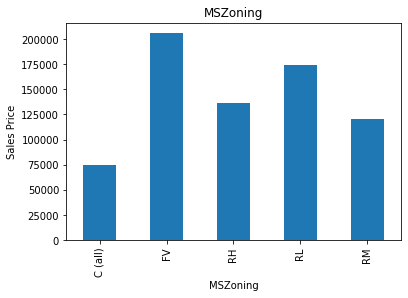

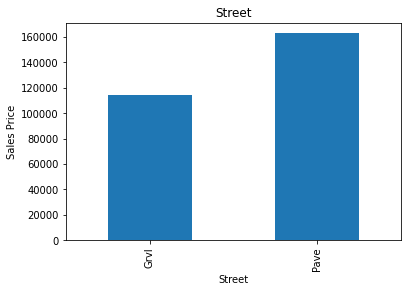

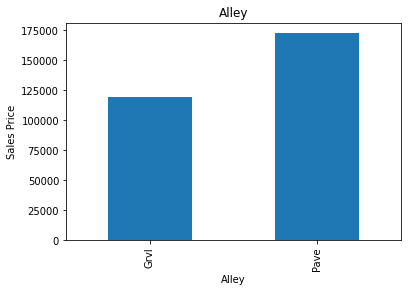

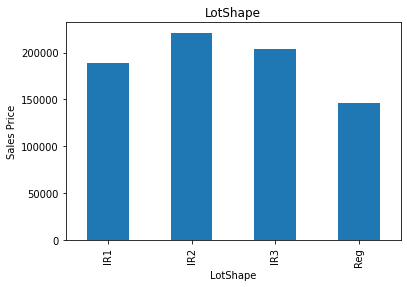

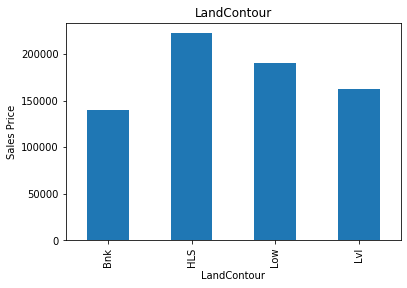

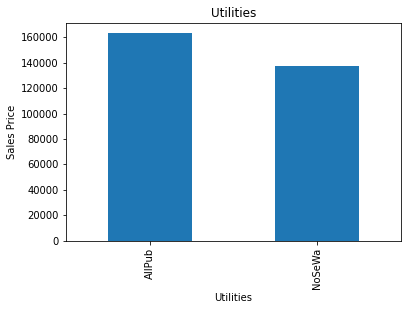

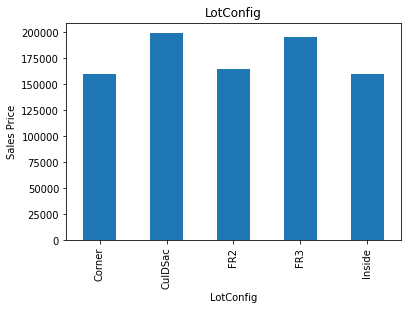

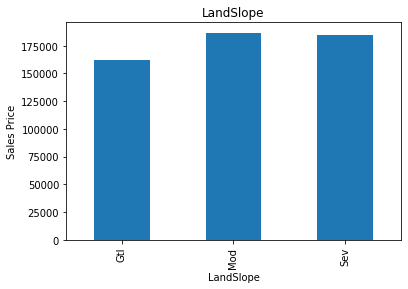

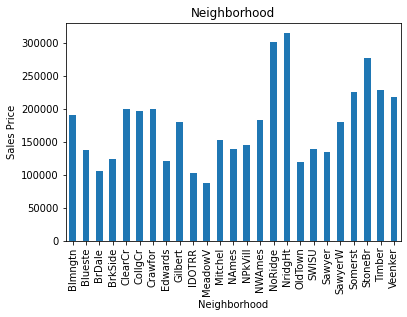

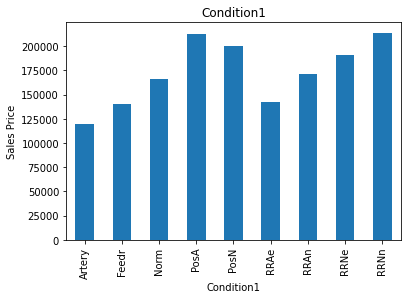

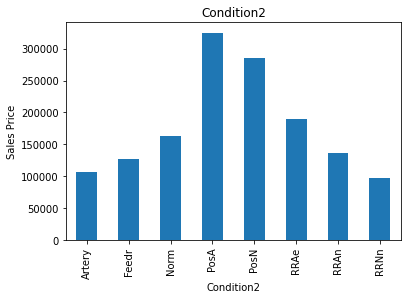

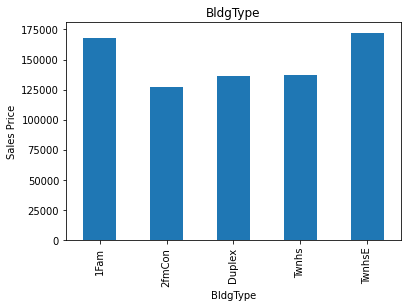

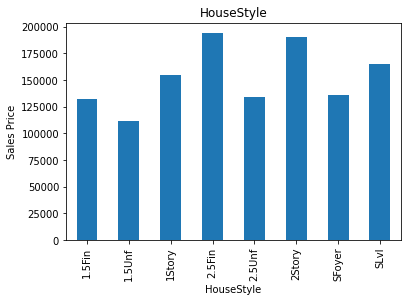

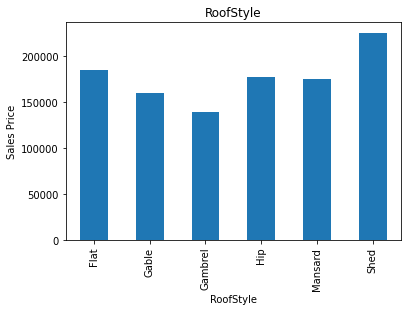

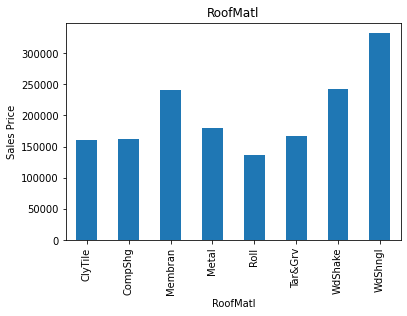

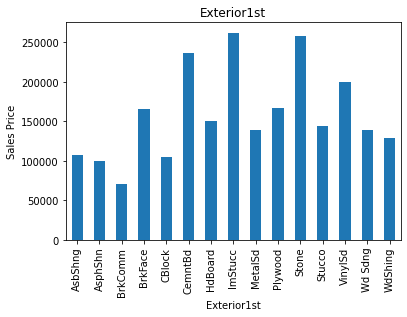

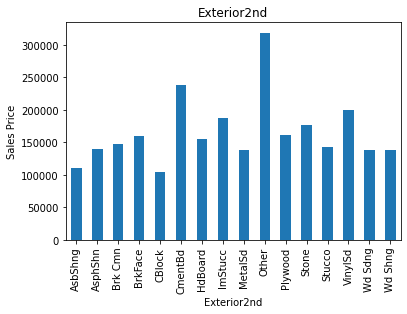

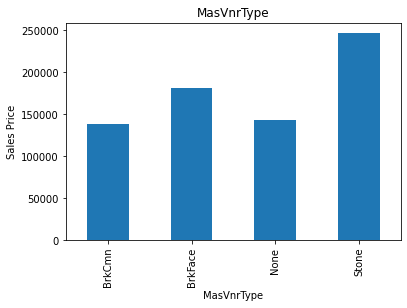

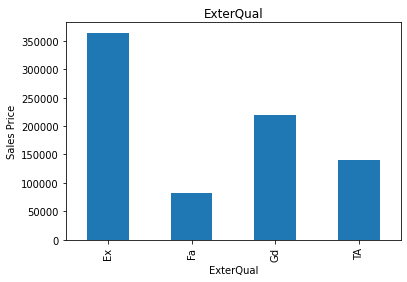

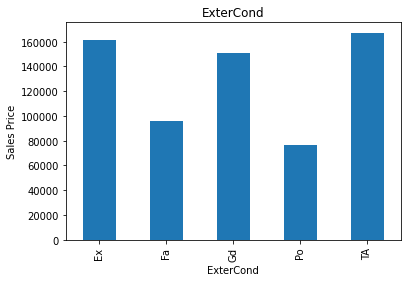

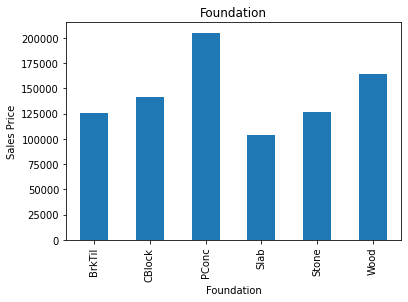

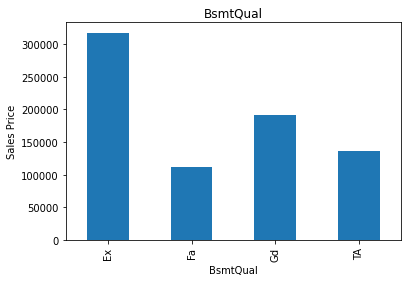

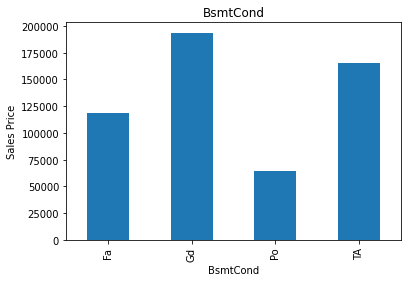

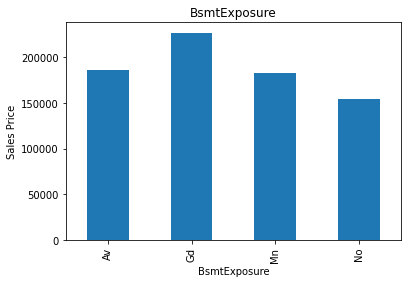

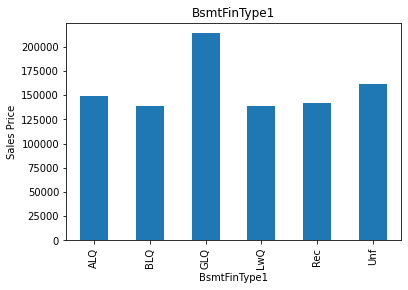

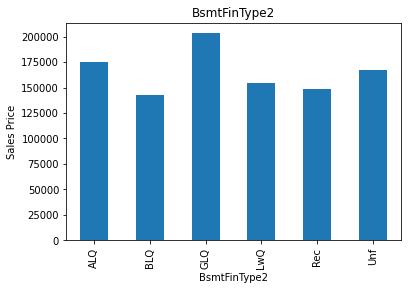

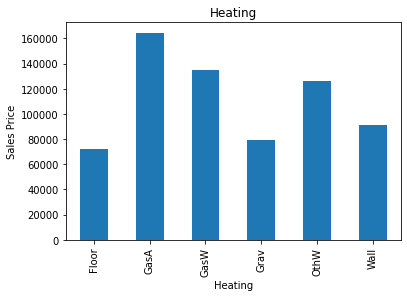

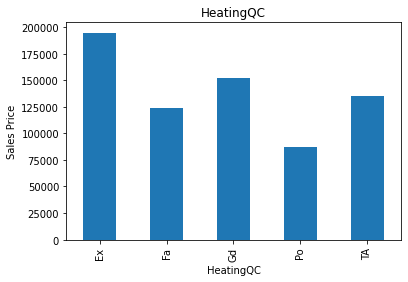

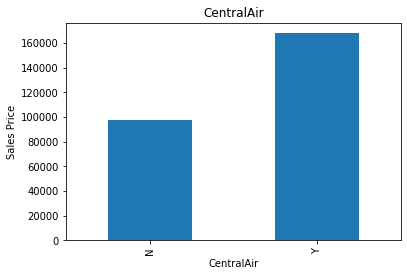

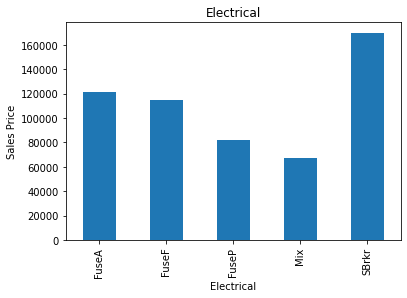

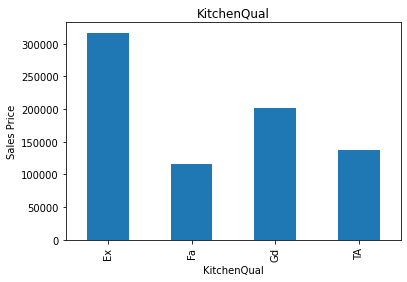

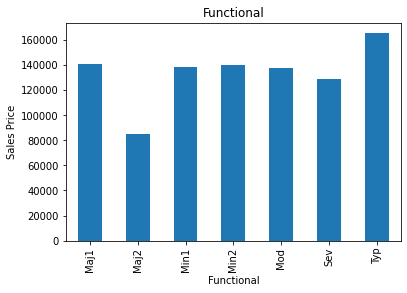

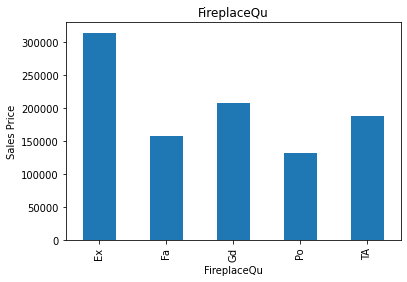

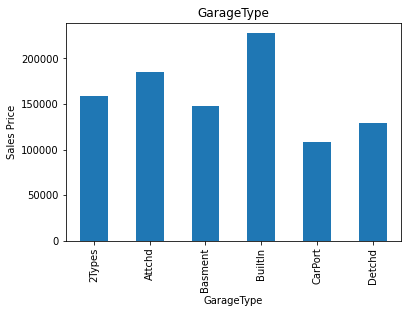

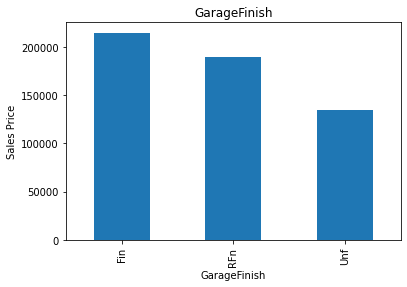

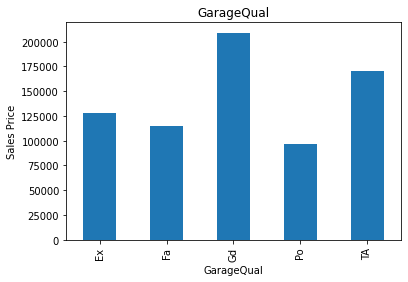

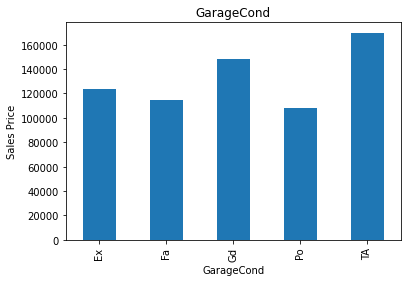

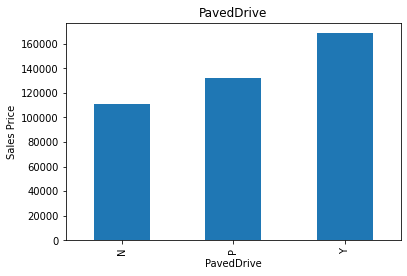

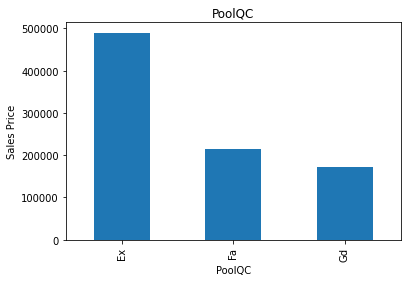

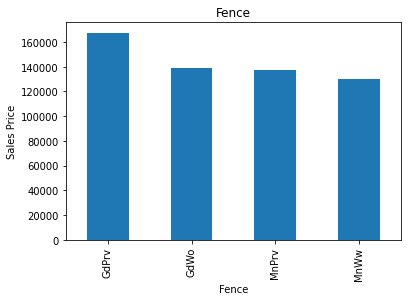

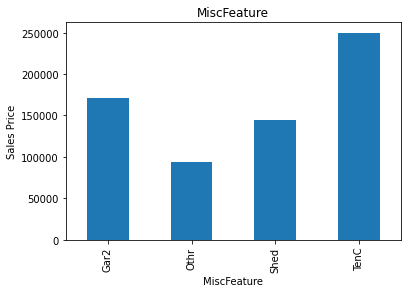

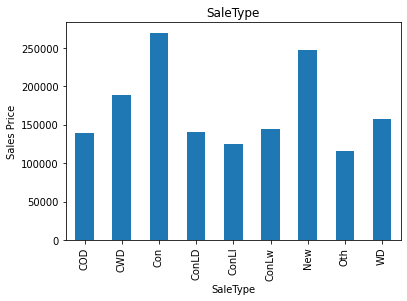

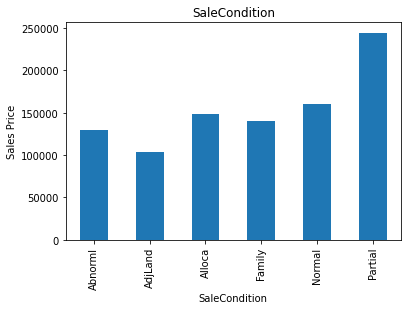

In [488]:
## now finding realtionship b/w these categorical features and dependent variable

for feature in categorical_features:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sales Price')
    plt.title(feature)
    plt.show()

# 2. Feature Engineering

we need to handle these below mentioned stuffs in this part 

1. Handling Missing Values
2. Temporal Variables(Datetime yr variables)
3. Categorical Variables : removing rare labels
4. Standardising the values of variables to the same range

In [489]:
test_df = pd.read_csv('test.csv')

In [490]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [491]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


To reduce data leakage we need to first split the train and test data

Since we have taken train dataset from kaggle we can skip this step

### Handling Missing Values

In [492]:
#handling missing values of categorical variables

feature_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtype == 'O']

for feature in feature_nan:
    print(f'{feature}  {np.round(df[feature].isnull().mean(),4)}% missng values')

Alley  0.9377% missng values
MasVnrType  0.0055% missng values
BsmtQual  0.0253% missng values
BsmtCond  0.0253% missng values
BsmtExposure  0.026% missng values
BsmtFinType1  0.0253% missng values
BsmtFinType2  0.026% missng values
FireplaceQu  0.4726% missng values
GarageType  0.0555% missng values
GarageFinish  0.0555% missng values
GarageQual  0.0555% missng values
GarageCond  0.0555% missng values
PoolQC  0.9952% missng values
Fence  0.8075% missng values
MiscFeature  0.963% missng values


In [493]:
test_feature_nan = [feature for feature in test_df.columns if test_df[feature].isnull().sum()>1 and test_df[feature].dtype == 'O']

for feature in test_feature_nan:
    print(f'{feature}  {np.round(test_df[feature].isnull().mean(),4)} % missng values')

MSZoning  0.0027 % missng values
Alley  0.9267 % missng values
Utilities  0.0014 % missng values
MasVnrType  0.011 % missng values
BsmtQual  0.0302 % missng values
BsmtCond  0.0308 % missng values
BsmtExposure  0.0302 % missng values
BsmtFinType1  0.0288 % missng values
BsmtFinType2  0.0288 % missng values
Functional  0.0014 % missng values
FireplaceQu  0.5003 % missng values
GarageType  0.0521 % missng values
GarageFinish  0.0535 % missng values
GarageQual  0.0535 % missng values
GarageCond  0.0535 % missng values
PoolQC  0.9979 % missng values
Fence  0.8012 % missng values
MiscFeature  0.965 % missng values


In [494]:
# Replacing Nan Values with a new label
def replace_cat_nan(df,feature_nan):
    data = df.copy()
    data[feature_nan]=data[feature_nan].fillna('Missing')
    return data

df = replace_cat_nan(df,feature_nan)
test_df = replace_cat_nan(test_df,test_feature_nan)


df[feature_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [495]:
df[test_feature_nan].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [496]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


In [497]:
test_numerical_features = [feature for feature in test_df.columns if test_df[feature].dtype != 'O']
print("Number of Numerical Variables:   ", len(numerical_features))

Number of Numerical Variables:    38


In [498]:
test_discreate_variables = [feature for feature in test_numerical_features if len(test_df[feature].unique())<25 and feature not in year_features+['Id']]
print("Number of discreate varibales  ",len(test_discreate_variables) )

Number of discreate varibales   16


In [499]:
test_continous_variables = [feature for feature in test_numerical_features if feature not in test_discreate_variables and feature not in year_features+['Id']]
print("Number of discreate varibales  ",len(test_continous_variables) )

Number of discreate varibales   16


### checking missing values in numerical variables 

In [500]:
numerical_with_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtype != 'O']
test_numerical_with_nan = [feature for feature in test_df.columns if test_df[feature].isnull().sum()>0 and test_df[feature].dtype != 'O']

for feature in numerical_with_nan:
    print(f'{feature} : {np.around(df[feature].isnull().mean(),4)} %')

LotFrontage : 0.1774 %
MasVnrArea : 0.0055 %
GarageYrBlt : 0.0555 %


In [501]:
for feature in test_numerical_with_nan:
    print(f"{feature} : {np.around(test_df[feature].isnull().mean(),4)} %")

LotFrontage : 0.1556 %
MasVnrArea : 0.0103 %
BsmtFinSF1 : 0.0007 %
BsmtFinSF2 : 0.0007 %
BsmtUnfSF : 0.0007 %
TotalBsmtSF : 0.0007 %
BsmtFullBath : 0.0014 %
BsmtHalfBath : 0.0014 %
GarageYrBlt : 0.0535 %
GarageCars : 0.0007 %
GarageArea : 0.0007 %


In [502]:
# since there are many outliers in the features 
# best way to handle the missing values is replacing it with median or mode

for feature in numerical_with_nan:
    median_values  = df[feature].median()
    #create a new feature to capture if the feature had nan values
    df[feature+'_nan'] = np.where(df[feature].isnull(),1,0) ##important step 
    df[feature].fillna(median_values,inplace=True)

    
for feature in test_numerical_with_nan:
    median_values  = test_df[feature].median()
    #create a new feature to capture if the feature had nan values
    test_df[feature+'_nan'] = np.where(test_df[feature].isnull(),1,0) ##important step 
    test_df[feature].fillna(median_values,inplace=True)

        
df[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [503]:
test_df[test_numerical_with_nan].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

In [504]:
test_df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,BsmtFinSF1_nan,BsmtFinSF2_nan,BsmtUnfSF_nan,TotalBsmtSF_nan,BsmtFullBath_nan,BsmtHalfBath_nan,GarageYrBlt_nan,GarageCars_nan,GarageArea_nan
0,1461,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
1,1462,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
2,1463,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
3,1464,60,RL,78.0,9978,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
4,1465,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Missing,Missing,Missing,0,1,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
5,1466,60,RL,75.0,10000,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,Missing,Missing,Missing,0,4,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
6,1467,20,RL,67.0,7980,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,Missing,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,Missing,GdPrv,Shed,500,3,2010,WD,Normal,1,0,0,0,0,0,0,0,0,0,0
7,1468,60,RL,63.0,8402,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,Missing,Missing,Missing,0,5,2010,WD,Normal

In [505]:
df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0
5,6,50,RL,85.0,14115,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,143000,0,0,0
6,7,20,RL,75.0,10084,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,307000,0,0,0
7,8,60,RL,69.0,10382,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,200000,1,0,0
8,9,50,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,Missing,

#### Temporal Variables

Earlier We analised that the SalePrice was decreasing with year sold

we Can convert these years variable to **Number of years**

In [506]:
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [507]:
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    df[feature] = df['YrSold']-df[feature]
    test_df[feature] = test_df['YrSold'] - test_df[feature]

In [508]:
df[year_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008


In [509]:
test_df[year_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,49,49,49.0,2010
1,52,52,52.0,2010
2,13,12,13.0,2010
3,12,12,12.0,2010
4,18,18,18.0,2010


### Handling Skewed Continous data

In [510]:
skewed_features = []
for feature in continous_variables:
    if 0 not in df[feature].unique():
        skewed_features.append(feature)
        
skewed_features

['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

In [511]:
test_skewed_features = []
for feature in test_continous_variables:
    if 0 not in test_df[feature].unique():
        test_skewed_features.append(feature)
        
test_skewed_features

['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

In [512]:
#Applying log normal distribution on those feature
for feature in skewed_features:
    df[feature] = np.log(df[feature])
    
for feature in test_skewed_features:
    test_df[feature] = np.log(test_df[feature])

In [513]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


In [514]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,BsmtFinSF1_nan,BsmtFinSF2_nan,BsmtUnfSF_nan,TotalBsmtSF_nan,BsmtFullBath_nan,BsmtHalfBath_nan,GarageYrBlt_nan,GarageCars_nan,GarageArea_nan
0,1461,20,RH,4.382027,9.360655,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,49.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
1,1462,20,RL,4.394449,9.565704,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,52.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
2,1463,60,RL,4.304065,9.534595,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,13.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
3,1464,60,RL,4.356709,9.208138,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,12.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
4,1465,120,RL,3.761200,8.518193,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,18.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Missing,Missing,Missing,0,1,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0


### HAndling Rare Categorical Feature
We will remove categorical variable that are present less than 1% of the observation


In [515]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [516]:
for feature in categorical_features:
    temp = df.groupby(feature)['SalePrice'].count()/len(df)
    temp_df = temp[temp>0.01].index
    df[feature] = np.where(df[feature].isin(temp_df),df[feature],'Rare_var')

In [517]:
for feature in categorical_features:
    temp = test_df.groupby(feature)['YrSold'].count()/len(test_df)
    temp_df = temp[temp>0.01].index
    test_df[feature] = np.where(test_df[feature].isin(temp_df),test_df[feature],'Rare_var')

In [518]:
pd.pandas.set_option('display.max_rows',None)

In [519]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0
5,6,50,RL,4.442651,9.554993,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,16,14,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Rare_var,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,6.679599,566,0,7.216709,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,16.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,11.870600,0,0,0
6,7,20,RL,4.317488,9.218705,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,3,2,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,7.434848,0,0,7.434848,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,3.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,12.634603,0,0,0
7,8,60,RL,4.234107,9.247829,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,36,36,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,7.009409,983,0,7.644919,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,36.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,12.206073,1,0,0
8,9,50,RM,3.931826,8.719317,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,77,58,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF

In [520]:
test_df.head(25)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,BsmtFinSF1_nan,BsmtFinSF2_nan,BsmtUnfSF_nan,TotalBsmtSF_nan,BsmtFullBath_nan,BsmtHalfBath_nan,GarageYrBlt_nan,GarageCars_nan,GarageArea_nan
0,1461,20,Rare_var,4.382027,9.360655,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,49.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
1,1462,20,RL,4.394449,9.565704,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,52.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Rare_var,12500,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
2,1463,60,RL,4.304065,9.534595,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,13.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
3,1464,60,RL,4.356709,9.208138,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,12.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
4,1465,120,RL,3.761200,8.518193,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,18.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Missing,Missing,Missing,0,1,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
5,1466,60,RL,4.317488,9.210340,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,17,16,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,6.637258,892,0,7.411556,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,17.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,Missing,Missing,Missing,0,4,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
6,1467,20,RL,4.204693,8.984694,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,18,3,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,7.079184,0,0,7.079184,1.0,0.0,2,0,3,1,TA,6,Typ,0,Missing,Attchd,18.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,Missing,GdPrv,Shed,500,3,2010,WD,Normal,1,0,0,0,0,0,0,0,0,0,0
7,1468,60,RL,4.143135,9.036225,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,12,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,6.670766,676,0,7.289611,0.0,0.0,2,1,3,1,TA,7,Typ,1,G

## Encoding Categorical features

we will use Odinal Number Encoding

In [521]:
for feature in categorical_features:
    labels_ordered=df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [522]:
for feature in categorical_features:
    labels_ordered=test_df.groupby([feature])['YrSold'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    test_df[feature]=test_df[feature].map(labels_ordered)

In [523]:
df.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,3,4.174387,9.041922,1,2,0,1,1,0,0,14,2,1,3,5,7,5,5,5,0,0,10,10,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,12.247694,0,0,0
1,2,20,3,4.382027,9.169518,1,2,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,12.109011,0,0,0
2,3,60,3,4.219508,9.328123,1,2,1,1,1,0,0,14,2,1,3,5,7,5,7,6,0,0,10,10,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,12.317167,0,0,0
3,4,70,3,4.094345,9.164296,1,2,1,1,1,1,0,16,2,1,3,5,7,5,91,36,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,11.849398,0,0,0
4,5,60,3,4.430817,9.565214,1,2,1,1,1,2,0,22,2,1,3,5,8,5,8,8,0,0,10,10,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,12.429216,0,0,0
5,6,50,3,4.442651,9.554993,1,2,1,1,1,0,0,9,2,1,3,1,5,5,16,14,0,0,10,10,1,0.0,1,3,3,3,3,1,6,732,5,0,64,796,2,4,1,3,6.679599,566,0,7.216709,1,0,1,1,1,1,1,5,4,0,1,4,16.0,1,2,480,2,3,2,40,30,0,320,0,0,0,2,1,700,10,2009,2,3,11.870600,0,0,0
6,7,20,3,4.317488,9.218705,1,2,0,1,1,0,0,18,2,1,3,3,8,5,3,2,0,0,10,10,4,186.0,2,3,4,4,3,3,6,1369,5,0,317,1686,2,4,1,3,7.434848,0,0,7.434848,1,0,2,0,3,1,2,7,4,1,4,4,3.0,2,2,636,2,3,2,255,57,0,0,0,0,0,4,2,0,8,2007,2,3,12.634603,0,0,0
7,8,60,3,4.234107,9.247829,1,2,1,1,1,1,0,12,5,1,3,5,7,6,36,36,0,0,6,5,4,240.0,1,3,2,3,3,2,4,859,1,32,216,1107,2,4,1,3,7.009409,983,0,7.644919,1,0,2,1,3,1,1,7,4,2,3,4,36.0,2,2,484,2,3,2,235,204,228,0,0,0,0,4,1,350,11,2009,2,3,12.206073,1,0,0
8,9,50,1,3.931826,8.719317,1,2,0,1,1,0,0,4,0,1,3,1,7,5,77,58,0,0,8,4,1,0.0,1,3,1,2,3,1,5,0,5,0,952,952,2,3,1,1,6.929517,752,0,7.480992,0,0,2,0,2,2,1,8,3,2,3,2,77.0,1,2,468,1,3,2,90,0,205,0,0,0,0,4,2,0,4,2008,2,0,11.774520,0,0,0
9,10,190,3,3.912023,8.911934,1,2,0,1,1,1,0,3,0,0,0,2,5,6,69,58,0,0,4,3,1,0.0,1,3,1,2,3,1,6,851,5,0,140,991,2,4,1,3,6.981935,0,0,6.981935,1,0,1,0,2,2,1,5,4,2,3,4,69.0,2,1,205,3,3,2,0,4,0,0,0,0,0,4,2,0,1,2008,2,3,11.678440,0,0,0


In [524]:
test_df.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,BsmtFinSF1_nan,BsmtFinSF2_nan,BsmtUnfSF_nan,TotalBsmtSF_nan,BsmtFullBath_nan,BsmtHalfBath_nan,GarageYrBlt_nan,GarageCars_nan,GarageArea_nan
0,1461,20,4,4.382027,9.360655,0,0,2,2,0,2,1,7,4,1,1,4,5,6,49,49,1,1,6,6,3,0.0,0,0,1,2,3,4,5,468.0,6,144.0,270.0,882.0,0,4,1,3,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,2,5,4,0,1,3,49.0,2,1.0,730.0,1,2,0,140,0,0,0,120,0,1,1,1,0,6,2010,1,4,0,0,0,0,0,0,0,0,0,0,0
1,1462,20,1,4.394449,9.565704,0,0,1,2,0,3,1,7,3,1,1,4,6,6,52,52,0,1,7,4,2,108.0,0,0,1,2,3,4,3,923.0,2,0.0,406.0,1329.0,0,4,1,3,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,3,6,4,0,1,3,52.0,2,1.0,312.0,1,2,0,393,36,0,0,0,0,1,0,0,12500,6,2010,1,4,0,0,0,0,0,0,0,0,0,0,0
2,1463,60,1,4.304065,9.534595,0,0,1,2,0,2,1,11,3,1,1,2,5,5,13,12,1,1,6,6,3,0.0,0,0,2,3,3,4,4,791.0,2,0.0,137.0,928.0,0,1,1,3,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,2,6,4,1,3,3,13.0,1,2.0,482.0,1,2,0,212,34,0,0,0,0,1,1,1,0,3,2010,1,4,0,0,0,0,0,0,0,0,0,0,0
3,1464,60,1,4.356709,9.208138,0,0,1,2,0,2,1,11,3,1,1,2,6,6,12,12,1,1,6,6,2,20.0,0,0,2,2,3,4,4,602.0,2,0.0,324.0,926.0,0,3,1,3,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,3,7,4,1,4,3,12.0,1,2.0,470.0,1,2,0,360,36,0,0,0,0,1,0,1,0,6,2010,1,4,0,0,0,0,0,0,0,0,0,0,0
4,1465,120,1,3.761200,8.518193,0,0,1,0,0,2,1,0,3,1,3,4,8,5,18,18,1,1,5,5,3,0.0,2,0,2,3,3,4,3,263.0,2,0.0,1017.0,1280.0,0,3,1,3,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,3,5,4,0,1,3,18.0,0,2.0,506.0,1,2,0,0,82,0,0,144,0,1,0,1,0,1,2010,1,4,0,0,0,0,0,0,0,0,0,0,0
5,1466,60,1,4.317488,9.210340,0,0,1,2,0,3,1,11,3,1,1,2,6,5,17,16,1,1,5,5,3,0.0,0,0,2,3,3,4,2,0.0,2,0.0,763.0,763.0,0,1,1,3,6.637258,892,0,7.411556,0.0,0.0,2,1,3,1,2,7,4,1,3,3,17.0,1,2.0,440.0,1,2,0,157,84,0,0,0,0,1,0,1,0,4,2010,1,4,0,0,0,0,0,0,0,0,0,0,0
6,1467,20,1,4.204693,8.984694,0,0,1,2,0,2,1,11,3,1,1,4,6,7,18,3,1,1,5,5,3,0.0,0,3,2,3,3,4,3,935.0,2,0.0,233.0,1168.0,0,3,1,3,7.079184,0,0,7.079184,1.0,0.0,2,0,3,1,2,6,4,0,1,3,18.0,1,2.0,420.0,1,2,0,483,21,0,0,0,0,1,2,2,500,3,2010,1,4,1,0,0,0,0,0,0,0,0,0,0
7,1468,60,1,4.143135,9.036225,0,0,1,2,0,2,1,11,3,1,1,2,6,5,12,12,1,1,6,6,3,0.0,0,0,2,3,3,4,2,0.0,2,0.0,789.0,789.0,0,1,1,3,6.670766,676,0,7.289611,0.0,0.0,2,1,3,1,2,7,4,1,4,3,12.0,1,2.0,393.0,1,2,0,0,75,0,0,0,0,1,0,1,0,5,2010,1,4,0,0,0,0,0,0,0,0,0,0,0
8,1469,20,1,4.442651,9.227787,0,0,2,2,0,2,1,11,3,1,1,4,7,5,20,20,1,1,5,5,3,0.0,0,0,2,3,3,2,4,637.0,2,0.0,663.0,1300.0,0,1,1,3,7.201171,0,0,7.201171,1.0,0.0,1,1,2,1,3,5,4,1,2,3,20.0,2,2.0,506.0,1,2,0,192,0,0,0,0,0,1,0,1,0,2,2010,1,4,0,0,0,0,0,0,0,0,0,0,0
9,1470,20,1,4.248495,9.035987,0,0,2,2,0,3,1,7,3,1,1,4,4,5,40,40,1,1,4,1,3,0.0,0,0,1,2,3,4,3,804.0,3,78.0,0.0,882.0,0,4,1,3,6.782192,0,0,6.782192,1.0,0.0,1,0,2,1,2,4,4,0,1,3,40.0,1,2.0,525.0,1,2,0,240,0,0,0,0,0,1,1,1,0,4,2010,1,4,0,0,0,0,0,0,0,0,0,0,0


In [525]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,3,4.174387,9.041922,1,2,0,1,1,0,0,14,2,1,3,5,7,5,5,5,0,0,10,10,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,12.247694,0,0,0
1,2,20,3,4.382027,9.169518,1,2,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,12.109011,0,0,0
2,3,60,3,4.219508,9.328123,1,2,1,1,1,0,0,14,2,1,3,5,7,5,7,6,0,0,10,10,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,12.317167,0,0,0
3,4,70,3,4.094345,9.164296,1,2,1,1,1,1,0,16,2,1,3,5,7,5,91,36,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,11.849398,0,0,0
4,5,60,3,4.430817,9.565214,1,2,1,1,1,2,0,22,2,1,3,5,8,5,8,8,0,0,10,10,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,12.429216,0,0,0


## Feature Scaling

In [526]:
feature_scale = [feature for feature in df.columns if feature not in ['Id','SalePrice']]
#use standard scaling and mixmax and use the best result 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test_scaler = MinMaxScaler()

scaler.fit(df[feature_scale])
test_scaler.fit(test_df[feature_scale])

MinMaxScaler()

In [527]:
scaler.transform(df[feature_scale])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

In [528]:
test_scaler.transform(test_df[feature_scale])

array([[0.        , 1.        , 0.59344538, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.25      , 0.59895721, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.25      , 0.55885415, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.25      , 0.90099208, ..., 0.        , 0.        ,
        0.        ],
       [0.38235294, 0.25      , 0.48035069, ..., 0.        , 0.        ,
        1.        ],
       [0.23529412, 0.25      , 0.55885415, ..., 0.        , 0.        ,
        0.        ]])

In [529]:
data = pd.concat([df[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],axis=1)

test_data = pd.concat([test_df[['Id']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(test_df[feature_scale]), columns=feature_scale)],axis=1)

In [530]:
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


In [531]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1461,0.000000,1.00,0.495064,0.428726,0.0,0.0,0.666667,0.666667,0.0,0.50,0.5,0.318182,0.8,1.0,0.25,0.8,0.444444,0.625,0.360294,0.819672,0.5,1.0,0.6,0.6,0.75,0.0000,0.000000,0.0,0.25,0.50,0.75,1.0,0.833333,0.082920,1.000000,0.097693,0.115582,0.144354,0.0,1.00,1.0,1.0,0.373438,0.000000,0.0,0.349081,0.0,0.0,0.333333,0.0,0.250,0.333333,0.666667,0.250000,1.0,0.000000,0.2,0.6,0.457944,0.666667,0.25,0.514810,0.333333,0.666667,0.0,0.163361,0.000000,0.0,0.0,0.25,0.0,1.0,0.25,0.5,0.000000,0.454545,1.0,0.333333,1.0,0.0,0.0,0.0
1,1462,0.000000,0.25,0.499662,0.468857,0.0,0.0,0.333333,0.666667,0.0,0.75,0.5,0.318182,0.6,1.0,0.25,0.8,0.555556,0.625,0.382353,0.868852,0.0,1.0,0.7,0.4,0.50,0.0675,0.000000,0.0,0.25,0.50,0.75,1.0,0.500000,0.163536,0.333333,0.000000,0.173801,0.217512,0.0,1.00,1.0,1.0,0.522632,0.000000,0.0,0.488544,0.0,0.0,0.333333,0.5,0.375,0.333333,1.000000,0.333333,1.0,0.000000,0.2,0.6,0.485981,0.666667,0.25,0.220028,0.333333,0.666667,0.0,0.458576,0.065814,0.0,0.0,0.00,0.0,1.0,0.00,0.0,0.806452,0.454545,1.0,0.333333,1.0,0.0,0.0,0.0
2,1463,0.235294,0.25,0.466207,0.462769,0.0,0.0,0.333333,0.666667,0.0,0.50,0.5,0.500000,0.6,1.0,0.25,0.4,0.444444,0.500,0.095588,0.213115,0.5,1.0,0.6,0.6,0.75,0.0000,0.000000,0.0,0.50,0.75,0.75,1.0,0.666667,0.140149,0.333333,0.000000,0.058647,0.151882,0.0,0.25,1.0,1.0,0.386718,0.339467,0.0,0.560546,0.0,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.6,0.121495,0.333333,0.50,0.339915,0.333333,0.666667,0.0,0.247375,0.062157,0.0,0.0,0.00,0.0,1.0,0.25,0.5,0.000000,0.181818,1.0,0.333333,1.0,0.0,0.0,0.0
3,1464,0.235294,0.25,0.485693,0.398875,0.0,0.0,0.333333,0.666667,0.0,0.50,0.5,0.500000,0.6,1.0,0.25,0.4,0.555556,0.625,0.088235,0.213115,0.5,1.0,0.6,0.6,0.50,0.0125,0.000000,0.0,0.50,0.50,0.75,1.0,0.666667,0.106662,0.333333,0.000000,0.138699,0.151555,0.0,0.75,1.0,1.0,0.385901,0.328329,0.0,0.555075,0.0,0.0,0.666667,0.5,0.375,0.333333,1.000000,0.416667,1.0,0.333333,0.8,0.6,0.112150,0.333333,0.50,0.331453,0.333333,0.666667,0.0,0.420070,0.065814,0.0,0.0,0.00,0.0,1.0,0.00,0.5,0.000000,0.454545,1.0,0.333333,1.0,0.0,0.0,0.0
4,1465,0.588235,0.25,0.265271,0.263841,0.0,0.0,0.333333,0.000000,0.0,0.50,0.5,0.000000,0.6,1.0,0.75,0.8,0.777778,0.500,0.132353,0.311475,0.5,1.0,0.5,0.5,0.75,0.0000,0.666667,0.0,0.50,0.75,0.75,1.0,0.500000,0.046598,0.333333,0.000000,0.435360,0.209493,0.0,0.75,1.0,1.0,0.508416,0.000000,0.0,0.475254,0.0,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.250000,1.0,0.000000,0.2,0.6,0.168224,0.000000,0.50,0.356841,0.333333,0.666667,0.0,0.000000,0.149909,0.0,0.0,0.30,0.0,1.0,0.00,0.5,0.000000,0.000000,1.0,0.333333,1.0,0.0,0.0,0.0


In [532]:
data.to_csv('House_train.csv',index=False)

In [534]:
test_data.to_csv('House_test.csv',index=False)